# Task 1
Web scraping to gain company insights
Scrape and analyse customer review data to uncover findings for British Airways

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url ="https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size=100


reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My husband and myself were ...
1,✅ Trip Verified | Organised boarding process. ...
2,✅ Trip Verified | Outward journey BA245 Londo...
3,✅ Trip Verified | Check in agent at LHR was ve...
4,✅ Trip Verified | Very disappointing. I book ...


In [4]:
df.to_csv("C://Users//Niharika//Desktop//Data//BA_reviews.csv")

In [5]:
df

,reviews
0,✅ Trip Verified | My husband and myself were ...
1,✅ Trip Verified | Organised boarding process. ...
2,✅ Trip Verified | Outward journey BA245 Londo...
3,✅ Trip Verified | Check in agent at LHR was ve...
4,✅ Trip Verified | Very disappointing. I book ...
...,...
995,✅ Trip Verified | First 3 legs were trouble fr...
996,✅ Trip Verified | Flew London to Budapest with...
997,✅ Trip Verified | Paid for a Vueling Airlines...
998,✅ Trip Verified | London to Sao Paulo. Overnig...


In [6]:
#Removing the checkbox part from the reviews 
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [7]:
df

,reviews
0,My husband and myself were flying to Madrid ...
1,Organised boarding process. Really friendly c...
2,Outward journey BA245 London to Buenos Aires...
3,Check in agent at LHR was very helpful and fr...
4,Very disappointing. I book BA so I can fly d...
...,...
995,First 3 legs were trouble free. Lounges were ...
996,Flew London to Budapest with British Airways....
997,Paid for a Vueling Airlines flight from Flor...
998,London to Sao Paulo. Overnight club world fli...


# Cleaning the text


In [8]:
import re
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
  
    def clean_text_column(row):
        text = row['text'].lower()
        text = re.sub(r'[^(a-zA-Z\s)]','',text)
        text = re.sub(r'\(','',text)
        text = re.sub(r'\)','',text)
        text = text.strip()
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid ...
1,Organised boarding process. Really friendly c...,Organised boarding process. Really friendly c...
2,Outward journey BA245 London to Buenos Aires...,Outward journey BA245 London to Buenos Aires...
3,Check in agent at LHR was very helpful and fr...,Check in agent at LHR was very helpful and fr...
4,Very disappointing. I book BA so I can fly d...,Very disappointing. I book BA so I can fly d...


# Tokenization
Tokenization is the process of breaking down a text into smaller units, such as words, phrases, symbols, or other meaningful elements, called tokens. 

In [9]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Niharika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Niharika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Niharika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# POS 
POS stands for "part-of-speech," and it refers to the category assigned to a word based on its definition and its context within a sentence.


# Stopword Removals
Stopwords are commonly occurring words in a language that are usually of little semantic value and are often removed from text data in NLP tasks

In [10]:
nltk.download('averaged_perceptron_tagger')

## POS tagging dictionary

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Niharika\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid ...,"[(husband, n), (flying, v), (Madrid, n), (3rd,..."
1,Organised boarding process. Really friendly c...,Organised boarding process. Really friendly c...,"[(Organised, v), (boarding, n), (process, n), ..."
2,Outward journey BA245 London to Buenos Aires...,Outward journey BA245 London to Buenos Aires...,"[(Outward, n), (journey, n), (BA245, n), (Lond..."
3,Check in agent at LHR was very helpful and fr...,Check in agent at LHR was very helpful and fr...,"[(Check, n), (agent, n), (LHR, n), (helpful, a..."
4,Very disappointing. I book BA so I can fly d...,Very disappointing. I book BA so I can fly d...,"[(disappointing, a), (., None), (book, n), (BA..."


# Lemmatization 
Lemmatization is the process of reducing a word to its base form, called a lemma. The lemma of a word is the dictionary form of the word, which is often the singular form of the word. 

In [11]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid ...,"[(husband, n), (flying, v), (Madrid, n), (3rd,...",husband fly Madrid 3rd February Legal matter...
1,Organised boarding process. Really friendly c...,Organised boarding process. Really friendly c...,"[(Organised, v), (boarding, n), (process, n), ...",Organised boarding process . Really friendly...
2,Outward journey BA245 London to Buenos Aires...,Outward journey BA245 London to Buenos Aires...,"[(Outward, n), (journey, n), (BA245, n), (Lond...",Outward journey BA245 London Buenos Aires Cl...
3,Check in agent at LHR was very helpful and fr...,Check in agent at LHR was very helpful and fr...,"[(Check, n), (agent, n), (LHR, n), (helpful, a...",Check agent LHR helpful friendly flight crew...
4,Very disappointing. I book BA so I can fly d...,Very disappointing. I book BA so I can fly d...,"[(disappointing, a), (., None), (book, n), (BA...",disappointing . book BA fly day . return fli...


In [12]:
df[['reviews','Lemma']]


,reviews,Lemma
0,My husband and myself were flying to Madrid ...,husband fly Madrid 3rd February Legal matter...
1,Organised boarding process. Really friendly c...,Organised boarding process . Really friendly...
2,Outward journey BA245 London to Buenos Aires...,Outward journey BA245 London Buenos Aires Cl...
3,Check in agent at LHR was very helpful and fr...,Check agent LHR helpful friendly flight crew...
4,Very disappointing. I book BA so I can fly d...,disappointing . book BA fly day . return fli...
...,...,...
995,First 3 legs were trouble free. Lounges were ...,"First 3 leg trouble free . Lounges good , st..."
996,Flew London to Budapest with British Airways....,Flew London Budapest British Airways . Massi...
997,Paid for a Vueling Airlines flight from Flor...,Paid Vueling Airlines flight Florence Gatwic...
998,London to Sao Paulo. Overnight club world fli...,London Sao Paulo . Overnight club world flig...



# Creating a WordCloud to visualize most frequent words

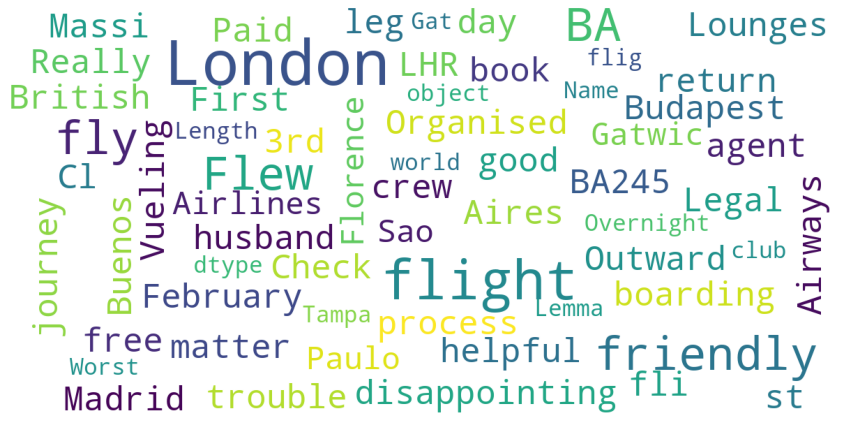

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(15, 20))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

In [14]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid ...,"[(husband, n), (flying, v), (Madrid, n), (3rd,...",husband fly Madrid 3rd February Legal matter...,0.9722,Positive
1,Organised boarding process. Really friendly c...,Organised boarding process. Really friendly c...,"[(Organised, v), (boarding, n), (process, n), ...",Organised boarding process . Really friendly...,0.9371,Positive
2,Outward journey BA245 London to Buenos Aires...,Outward journey BA245 London to Buenos Aires...,"[(Outward, n), (journey, n), (BA245, n), (Lond...",Outward journey BA245 London Buenos Aires Cl...,-0.1119,Negative
3,Check in agent at LHR was very helpful and fr...,Check in agent at LHR was very helpful and fr...,"[(Check, n), (agent, n), (LHR, n), (helpful, a...",Check agent LHR helpful friendly flight crew...,0.2516,Neutral
4,Very disappointing. I book BA so I can fly d...,Very disappointing. I book BA so I can fly d...,"[(disappointing, a), (., None), (book, n), (BA...",disappointing . book BA fly day . return fli...,-0.1531,Negative


In [17]:
vader_counts = df['Analysis'].value_counts()
vader_counts


Positive    526
Negative    356
Neutral     118
Name: Analysis, dtype: int64

# Visualization


([<matplotlib.patches.Wedge at 0x13933398bb0>,
 [Text(-0.08974975155714607, 1.0963325143839484, 'Positive'),
  Text(-0.31352101655344905, -1.0543740191124267, 'Negative'),
  Text(1.2582960923000015, -0.48907151225822415, 'Neutral')],
 [Text(-0.048954409940261484, 0.5979995533003355, '52.6%'),
  Text(-0.17101146357460856, -0.5751131013340509, '35.6%'),
  Text(0.7922605025592602, -0.3079339151255485, '11.8%')])

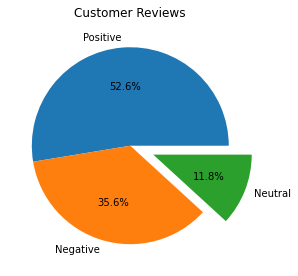

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Customer Reviews")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)